<a href="https://colab.research.google.com/github/anammagalhaes/Data-Science-Projects-/blob/master/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Churn Prediction para uma empresa de Telecomunicações**

*Churn rate* é um termo amplo que se refere à ação de pessoas deixando um grupo específico em um determinado período de tempo. Portanto, pode ser aplicado a funcionários que estão saindo de uma empresa ou a clientes que encerram suas assinaturas de serviço, por exemplo. Desta forma, criar estratégias que prevejam situação como esta, é de extrema necessidade para criar ações para evitá-las. Visto que o custo para adquirir clientes é mais alto do que para mantê-los. 
Neste cenário, este projeto tem como finalidade construir um modelo de Machine Learning para predizer, com base em dados históricos, a saída ou não do cliente em uma empresa de Telecomunicações. 

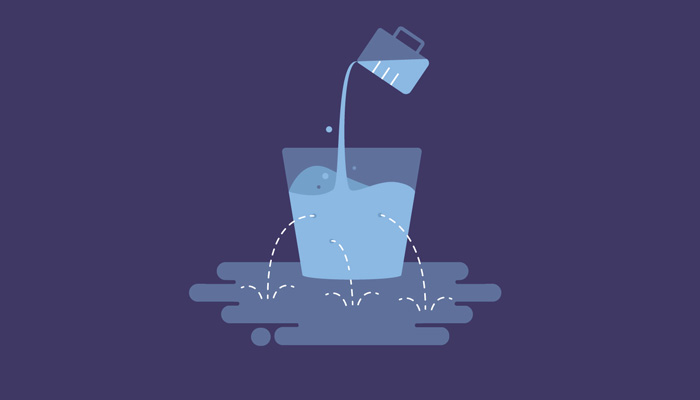

## **Aquisição do Banco de Dados**

O banco de dados original é disponibilizado pela [plataforma de ensino da IBM Developer ](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), o qual trata do problema de Churn mencionado em uma empresa de Telecomunicações. 
Não há informações explícitas sobre os nomes das variáveis, no entanto, são bastante auto explicativas. 

## **Importando os pacotes necessários e criando um DataFrame**

In [1]:
# instalar Pandas Profiling
!pip install scikit-plot -q
!pip install imbalanced-learn -q

In [5]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# random seed
np.random.seed(42)

# importar os dados
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv") #Este banco de dados é o original, no entanto foi retirado do Github do professor do curso Sigmoidal, no qual este trabalho faz parte. 

# ver as 5 primeiras entradas
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


A visualização das 5 primeiras entradas já permite entender como o dataset está composto. 


In [ ]:
# Verificaçao da dimensão do dataframe em linhas (entradas) e colunas (variáveis ou features)

print("Linhas:\t\t{}".format(df.shape[0]))
print("Colunas:\t{}".format(df.shape[1]))

Linhas:		7043
Colunas:	21


## Análise Exploratória dos Dados

Logo de início, a Análise Exploratória demanda conhecimento sobre o banco de dados, portanto, basicamente serão verificados quantidade de dados ausentes, os nomes das colunas, os tipos de variáveis por coluna e os valores únicos por coluna. Estas etapas são essenciais para a identificação de veriáveis categórias, levantamento de hipóteses para contrução do modelo e se necessário, como os dados devem ser limpos e tratados antes de alimentar um modelo de machine learning. Além disso, gera conhecimento para identificar qual modelo pode ser melhor para aplicar no problema em questão. 

In [ ]:
print("Dados ausentes:")
print(df.isnull().sum() / df.shape[0])


Dados ausentes:
customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


In [ ]:
print("Nomes das features:")
print(df.columns.values)


Nomes das features:
['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


In [ ]:
print("Valores únicos (por feature):")
print(df.nunique())


Valores únicos (por feature):
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [ ]:
print("Tipos de Variáveis (por coluna):")
df.dtypes

Tipos de Variáveis (por coluna):


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Algumas conclusões podem ser extraídas desta análise inicial: 

*   A variável "costumerID" não agregará nenhuma informação adicional na construção do modelo, pois se trata de um identificador único para cada cliente;
*   A variável alvo (ou dependente) está na coluna "Churn", em que indica a situação de churn, em No ou Yes. 
*   A coluna TotalCharges está como string, no entanto, deveria estar como float, pois pelas entradas que analisamos, aparentemente são floats.
*   A maioria das features precisam ser convertidas em valores numéricos.
*   Apesar de identificar que não existem valores ausentes, algumas strings representam valores ausentes. 
*   Há várias variáveis categóricas representadas também por Yes e No. 
Tudo isso precisará ser tratado nas próximas etapas. 







In [ ]:
# converter coluna TotalCharges para float
# df["TotalCharges"].astype('float32')

Ao tentar converter de string para float, o interpretador retorna um erro. Na verdade, analisando o banco de dados inteiro, pode-se avaliar que os dados ausentes foram preenchidos com aspas "", que é interpretada como string. É por isso que retorna o erro. 

Quando acontece isso, é melhor definir uma função que entre o string e saia o calor convertido em float. Se isso não for possível, que seja substituido por NaN. 



In [ ]:
def converter_str_float(entrada):   #esta função é como???? 
    """
    Converte um objeto do tipo string em float.

    # Arguments
        entrada: string, string da coluna TotalCharges.

    # Returns
        Valor convertido em float, caso permita a conversão.
        NaN, caso o valor não seja apropriado.
    """

    try:
        return float(entrada)
    except ValueError:
        return np.nan

 Em seguida, estes  possiveis valores ausentes (NaN) foram substituidos pelo valor da mediana da coluna "TotalCharges" (isso pode ser optado de acordo com o problema a solucionar, não necessariamente deve-se substituir pela mediana). Foi removida a coluna CostumerID também. Estas mudanças farão parte do novo dataframe: df_clean. 


In [ ]:
# criar cópia do dataframe
df_clean = df.copy()

# remover coluna costumerID
df_clean.drop("customerID", axis=1, inplace=True)

# converter as strings de TotalCharges para float usando a função definida anteriormente. 
df_clean["TotalCharges"] = df_clean["TotalCharges"].apply(converter_str_float)

# verificar entradas ausentes (as quais receberam NaN)
print("Dados ausentes em 'TotalCharges' (antes):\t{}\n".format(df_clean["TotalCharges"].isnull().sum()))

# substituir os dados ausentes pelo valor da mediana
TotalChargesMedian = df_clean.TotalCharges.median()
df_clean["TotalCharges"].fillna(TotalChargesMedian, inplace=True)

Dados ausentes em 'TotalCharges' (antes):	11



Apesar deste dataset ser composto majoritariamente por variáveis binárias ou categóricas, é possível ver abaixio, pelo método describe, que não há indícios da presença de outliers nas variáveis numéricas.

In [ ]:
df_clean.describe() 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Analisando o boxplot para as colunas MonthlyCharges e TotalCharges, a distribuição dos valores reforça essa hipótese. O threshold padrão não acusou nenhum plot fora dos limites superior e inferior.

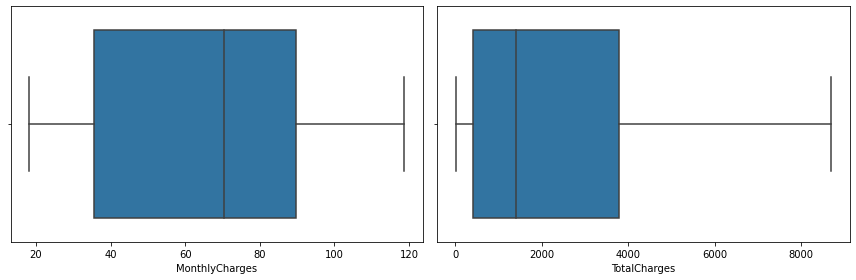

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.boxplot(df_clean['MonthlyCharges'], ax=ax[0])
sns.boxplot(df_clean['TotalCharges'], ax=ax[1])
plt.tight_layout()



A variável Tenure está relacionada ao tempo que um cliente permance assinando determinado serviço. Em outras palavras, pode-se dizer que é um indicativo de fidelidade. Foi assumida que a unidade de tempo utilizada é "mês". A partir do gráfico disponibilizado abaixo, é possível verificar que cerca de 600 clientes ficam aproximadamente 1 mês assinando um serviço, mas que isso é bastante variável. Tendo clientes que permanecem diversos outros períodos até 72 meses. 


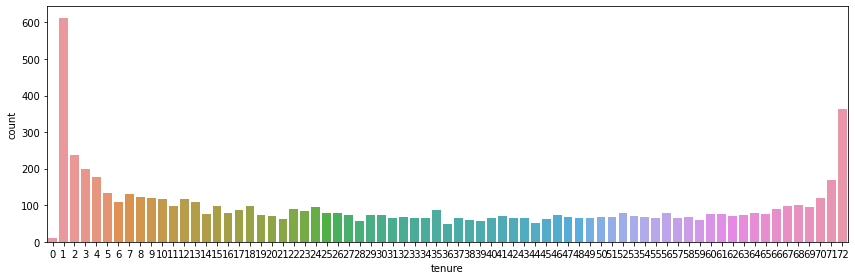

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(df['tenure'])
plt.tight_layout()

Lidando com variáveis categóricas, é importante ver os valores únicos. Isso permite identificar situações como labels diferentes querendo indicar a mesma coisa. É preciso analisar, exemplo: 
Vendo os valores impressos na célula abaixo, podemos considerar valores como No, No phone service e No internet service como sendo a mesma coisa. Isso é uma sugestão, mas aqui será considerado cada label individualmente. 


In [ ]:
# verificar valores únicos das variáveis categóricas
np.unique(df_clean.select_dtypes('object').values)

array(['Bank transfer (automatic)', 'Credit card (automatic)', 'DSL',
       'Electronic check', 'Female', 'Fiber optic', 'Mailed check',
       'Male', 'Month-to-month', 'No', 'No internet service',
       'No phone service', 'One year', 'Two year', 'Yes'], dtype=object)

Por fim, nesta primeira análise exploratória, vamos ver o balanceamento das classes dda variável Churn, a variável alvo.

É possível identificar a partir do gráfico de barras que a classe No ocorre com frequência muito superior à classe Yes, ou seja, está desbalanceado. Esta questão deve ser trabalhada, uma vez que o desbalanceamento das classes enviesa o modelo. Logo, para alimentar o modelo, as classes serão balanceadas. 

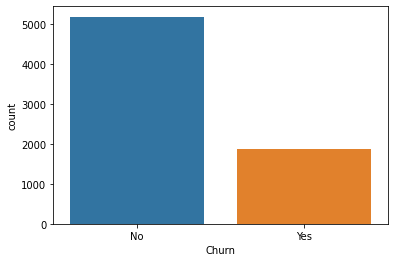

In [ ]:
sns.countplot(df.Churn)

Essta análise exploratória é bastante sucinta, no entanto, é racional estabelecer o problema e analisar os dados de forma a levantar hipóteses para aquele problema, sem extender as análises à outras soluções ainda fora do escopo atual. No entanto, este banco de dados abre um leque para extrair diversas outras informações, gerando possibilidade para a construção de uma diversidade de gráficos ou ainda, encontrar novas problemáticas para desenvolver modelos que as solucionem. 

## Preparação dos Dados 

Nesta etapa de preparação dos dados, será realizado um pré-processamento básico, apenas com a finalidade de construir um modelo base.

As features que continham dois labels únicos serão processadas usando o LabelEncoder, as categóricas serão transformadas em variáveis dummy, para permitir a sua utilização em todos os modelos. Vale lembrar que isso inclui a variável alvo Churn. Na sequência, serão separadas as variáveis numéricas das categóricas. 

In [ ]:
# pré processar as variáveis
binary_var = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
num_var = [col for col in df_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in binary_var]
cat_var = [col for col in df_clean.columns.tolist() if col not in binary_var + num_var]

# criar uma cópia do dataframe
df_proc = df_clean.copy()

# Label Encoding para as variáveis Binárias
le = LabelEncoder()
for i in binary_var:
    df_proc[i] = le.fit_transform(df_proc[i])

# Encoding para colunas categóricas com múltiplas classes
df_proc = pd.get_dummies(df_proc, columns=cat_var)

# ver as 5 primeiras entradas do novo dataframe
df_proc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


## Modelo de Machine Learning

Posterior à análise exploratória, limpeza e tratamento dos dados, já podem ser construidos os modelos de Machine Learning. 

Neste trabalho não foi realizado nenhum ajuste nos hiperparâmetros, nem balanceamento de dados, feature engineering ou feature selection ou outras tecnicas que podem ser que melhorem a performance dos modelos. O objetivo aqui é criar um baseline simples para logo em seguida comparar com os outros modelos. 

Primeiramente, foi dividido entre dados de treino e teste. Os dados de teste só irão ser usados na última etapa do projeto, para termos uma avaliação mais real.

In [ ]:
# separar a feature matrix da target vector
X = df_proc.drop('Churn', axis=1)
y = df_proc['Churn']

# dividir os dados entre treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y)

Foi utilizada a técnica de cross-validation para estimar o erro da baseline e dos modelos iniciais. Para facilitar e melhorar o código, foi criada uma função `val_model`, que permite estabelecer um pipeline. A métrica utilizada para avaliação será `recall`.

In [ ]:
def val_model(X, y, clf, quite=False):
    """
    Realiza cross-validation com os dados de treino para determinado modelo.

    # Arguments
        X: DataFrame, contém as variáveis independetes.
        y: Series, vetor contendo a variável alvo.
        clf: modelo classificador do Scikit-learn.
        quite: bool, indicando se a função deve imprimir os resultados ou não.

    # Returns
        float, média dos scores da cross-validation.
    """
    
    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    if quite == False:
        print("Recall: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
    
    return scores.mean()

Para o baseline inicial, usarei o Random Forest, sem nenhum tipo de alteração nos parâmetros. Os dados que serão passados são os de treino.

In [ ]:
# Instanciar o modelo e analisar o seu desempenho
rf = RandomForestClassifier()
score_baseline = val_model(X_train, y_train, rf)

Recall: 0.47 (+/- 0.02)


Agora que com um baseline simples, foi realizado o balanceamento dos dados das variáveis para comparar se este ajustes melhora ou piora o desempenho do modelo. Esta etapa será realizada com Under Sampling. No entanto, antes de balancear, os dados devem ser padronizados. Lembrando que as variáveis já foram transformadas em dummies. 

É importante que o balanceamento aconteca apenas com os dados de treino. Os dados de teste devem permanecer intocáveis até o momento de usá-los para testar o modelo. 

In [ ]:
#  padronizar os  dados,
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)


rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)

A aplicação da cross validation a vários modelos foi realizada a vários modelos, a fim de identificar os seus desempenhos e escolher o(s) melhor(es). Novamente, serão utilizados apenas dados de treino. Os modelos escolhidos são:

Random Forest,
Decision Tree,
Stochastic Gradient Descent,
SVC,
Regressão Logística,
LightGBM. 

In [ ]:
# instanciar modelos
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

model = []
recall = []
# avaliar o desempenho (recall)
for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_train_rus, y_train_rus, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
RandomForestClassifier,0.769784
DecisionTreeClassifier,0.681295
SGDClassifier,0.733813
SVC,0.790647
LogisticRegression,0.807194
XGBClassifier,0.805036
LGBMClassifier,0.766187


Dadas as características do problema e o desempenho durante as execuções anteriores, optei pelo XGBoost, praticamente empatado com a Regressão Logística.

No entanto, neste modelo, o tuning dos parâmetros pode melhorar ainda mais a qualidade da solução. Como temos poucos ajustes possíveis na Regressão Logística, não acredito que o resultado poderia passar o XGBoost.

Otimização dos Hiperparâmetros
XGBoost possui inúmeros parâmetros. Alguns afetam mais a qualidade do modelo, outros menos. Uma boa prática é definir uma taxa de aprendizado e número de estimadores, realizar tuning de outros parâmetros e, no final, checar outras taxas de aprendizado.

Abaixo,  número de estimadores foi ajustado. O modelo foi instanciado com a learning_rate=0.1.

In [ ]:
xgb = XGBClassifier(learning_rate=0.1)

param_grid = {
 'n_estimators':range(0,1000,50),
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8107913669064748 para {'n_estimators': 50}


Com o número de estimadores igual a 50, foi realizada a busca pelos parâmtros max_depth e min_child_weight.


In [ ]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50)

param_grid = {
 'max_depth':range(1,8,1),
 'min_child_weight':range(1,5,1)
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Obtidos os valores de max_depth=1 e min_child_weight=1, irei otimizar o parâmetro gamma.

In [ ]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50, max_depth=1, min_child_weight=1)

param_grid = {
 'gamma':[i/10.0 for i in range(0,5)]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Por fim, obtido gamma=0, foi testados quatro valores para a learning_rate e ver qual oferece o melhor resultado.

In [ ]:
xgb = XGBClassifier(n_estimators=50, max_depth=1, min_child_weight=1, gamma=0.0)

param_grid = {
 'learning_rate':[0.001, 0.01, 0.1, 1]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.881294964028777 para {'learning_rate': 0.001}


Fato é que uma taxa de aprendizado menor, conseguiu melhorar o desempenho do modelo XGBoost, considerando recall como sendo a única métrica de importância. Lembrando que há outras métricas, mas aqui foi considerada somente o recall. 

Agora, o modelo foi treinado em cima do dataset de treino completo, e verifica-se o desempenho final em cima dos dados de teste, no seu primeiro contato com esse sub-conjunto que havia sido preservado.

              precision    recall  f1-score   support

           0       0.94      0.57      0.71      1282
           1       0.44      0.90      0.59       479

    accuracy                           0.66      1761
   macro avg       0.69      0.73      0.65      1761
weighted avg       0.80      0.66      0.68      1761

AUC: 0.7336



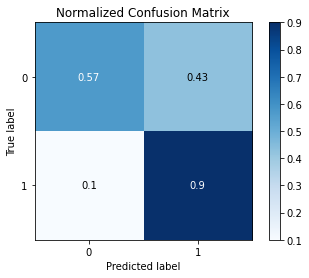

In [ ]:
# modelo final
xgb = XGBClassifier(learning_rate=0.001 , n_estimators=50, max_depth=1, min_child_weight=1, gamma=0.0)
xgb.fit(X_train_rus, y_train_rus)

# fazer a previsão
X_test = scaler.transform(X_test)
y_pred = xgb.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# plotar matriz de confusão
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

## Conclusões

Os modelos testados tiveram uma boa performance, principalmente RandomForest e XGBoost. No entanto, podem ser melhorados a partir do ajuste de hiperparâmetros, e se, a partir de mais análises, verificar a necessidade de tecnicas como feature engineering e feature selection. 

Além disso, os modelos podem ser avaliados e comparados entre eles a partir de outras métricas, como acurácia, precisão e recall. 
